# EDA - Categorical Features

# Imports

## Packages

In [135]:
import json
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px

## Data

In [63]:
## Read configured settings from JSON file

with open('../../config/Shared_Settings.json', 'r') as file:
    settings = json.load(file)
    
settings

{'source': '../../data/WA_Fn-UseC_-HR-Employee-Attrition.csv',
 'feature_types': {'feature_names_categorical': ['BusinessTravel',
   'Department',
   'EducationField',
   'Gender',
   'JobRole',
   'MaritalStatus',
   'OverTime'],
  'feature_names_continuous': ['Age',
   'DailyRate',
   'DistanceFromHome',
   'EmployeeNumber',
   'HourlyRate',
   'MonthlyIncome',
   'MonthlyRate',
   'NumCompaniesWorked',
   'PercentSalaryHike',
   'TotalWorkingYears',
   'TrainingTimesLastYear',
   'YearsAtCompany',
   'YearsInCurrentRole',
   'YearsSinceLastPromotion',
   'YearsWithCurrManager'],
  'feature_names_ordinal': ['PerformanceRating',
   'RelationshipSatisfaction',
   'EnvironmentSatisfaction',
   'WorkLifeBalance',
   'JobInvolvement',
   'StockOptionLevel',
   'JobSatisfaction',
   'JobLevel',
   'Education']},
 'target_feature': 'Attrition'}

In [65]:
cols_list = [settings['target_feature']] + settings['feature_types']['feature_names_categorical']
cols_list

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [66]:
categorical_data = pd.read_csv(settings['source'], usecols = cols_list)
categorical_data

,Attrition,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


# EDA by Feature

In [67]:
categorical_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Attrition       1470 non-null   object
 1   BusinessTravel  1470 non-null   object
 2   Department      1470 non-null   object
 3   EducationField  1470 non-null   object
 4   Gender          1470 non-null   object
 5   JobRole         1470 non-null   object
 6   MaritalStatus   1470 non-null   object
 7   OverTime        1470 non-null   object
dtypes: object(8)
memory usage: 92.0+ KB


In [68]:
categorical_data.describe().T.sort_values(by = "unique")

,count,unique,top,freq
Attrition,1470,2,No,1233
Gender,1470,2,Male,882
OverTime,1470,2,No,1054
BusinessTravel,1470,3,Travel_Rarely,1043
Department,1470,3,Research & Development,961
MaritalStatus,1470,3,Married,673
EducationField,1470,6,Life Sciences,606
JobRole,1470,9,Sales Executive,326


In [90]:
# def eda_results(dataframe, target, feature):
    
#     value_counts = dataframe[feature].value_counts(normalize= True).round(3)
        
#     bar_plot = sns.countplot(data = dataframe,
#                              x = dataframe[feature],
#                              hue = dataframe[target])
    
#     return value_counts, bar_plot

In [114]:
# def eda_results(dataframe, target, feature):
    
#     value_counts = dataframe.value_counts(subset = [feature, target], normalize= True, sort=False).round(2)
#     display(value_counts)
    
    
#     bar_plot = sns.countplot(data = dataframe,
#                              x = dataframe[feature],
#                              hue = dataframe[target])
    
#     return value_counts, bar_plot

In [166]:
# def eda_results(dataframe, target, feature):
    
#     value_counts = dataframe.value_counts(subset = [feature, target], normalize= True, sort=False).round(2)
#     # display(value_counts)
    
    
#     bar_plot = (sns.countplot(data = dataframe,
#                              x = dataframe[feature],
#                              hue = dataframe[target])
#                 .get_figure())
    
#     plt.close()
    
#     return dict(feature = feature, value_counts = value_counts, plot = bar_plot)

In [167]:
def eda_results(dataframe, target, feature):
    
    value_counts = (pd.DataFrame(dataframe
                                 .value_counts(
                                     subset = [feature, target],
                                     normalize= True,
                                     sort=False)
                                 .round(2))
                    )    
    
    bar_plot = (sns.countplot(data = dataframe,
                             x = dataframe[feature],
                             hue = dataframe[target])
                .get_figure())
    
    plt.close()
    
    return dict(value_counts = value_counts, plot = bar_plot)

In [170]:
results_dict = {}

for col in categorical_data.columns:
    
    if col != settings['target_feature']:
              
        results_dict[col] = eda_results(categorical_data,
                                             target = settings['target_feature'],
                                             feature = col)

        print(f'Completed feature: {col}')
    
    else:
        pass

c:\Users\Ben\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ben\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ben\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ben\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ben\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_

Completed feature: BusinessTravel
Completed feature: Department
Completed feature: EducationField
Completed feature: Gender
Completed feature: JobRole
Completed feature: MaritalStatus
Completed feature: OverTime
Completed feature: BT_Ord


c:\Users\Ben\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ben\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ben\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ben\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ben\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_

In [174]:
pd.DataFrame(results_dict['BusinessTravel']['value_counts'])

proportion
BusinessTravel    Attrition            
Non-Travel        No               0.09
                  Yes              0.01
Travel_Frequently No               0.14
                  Yes              0.05
Travel_Rarely     No               0.60
                  Yes              0.11

## BusinessTravel

c:\Users\Ben\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ben\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ben\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

c:\Users\Ben\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



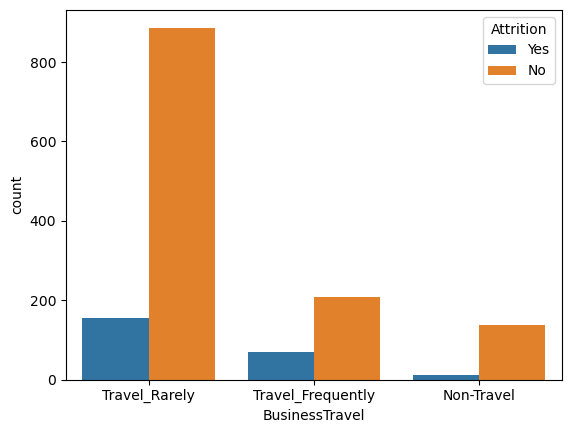

In [149]:
# vc, _ = eda_results(categorical_data, settings['target_feature'], 'BusinessTravel')
# display(vc)
eda_results(categorical_data, settings['target_feature'], 'BusinessTravel')

In [117]:
categorical_data['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [123]:
cond = [categorical_data['BusinessTravel'] == "Non-Travel",
        categorical_data['BusinessTravel'] == 'Travel_Rarely',
        categorical_data['BusinessTravel'] == 'Travel_Frequently']

choice = [0, 1, 2]

categorical_data['BT_Ord'] = np.select(cond, choice, -1)
categorical_data['BT_Ord']

0       1
1       2
2       1
3       2
4       1
       ..
1465    2
1466    1
1467    1
1468    2
1469    1
Name: BT_Ord, Length: 1470, dtype: int32

c:\Users\Ben\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ben\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ben\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='BT_Ord', ylabel='Attrition'>

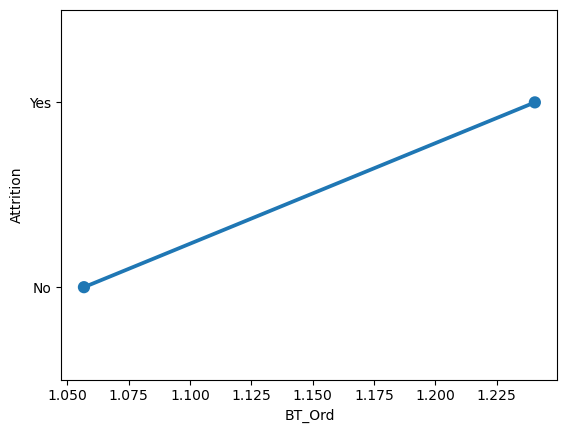

In [129]:
sns.pointplot(x="BT_Ord", y=settings['target_feature'], data=categorical_data, errorbar=None)

In [141]:
px.box(data_frame=categorical_data, x = 'BusinessTravel', y = 'Attrition',
       category_orders = {'BusinessTravel': ['Non-Travel', 'Travel_Rarely', 'Travel_Frequently']})

---

**Results:**

The attrition rates vary based on if the staff traveled or not.

- Non-Travel: ~9x less likely to leave.
- Travel_Rarely: ~6x less likely to leave.
- Travel_Frequently: ~3x less likely to leave.

Considering that each feature represents a natural progression of increasing amounts of travel, it may be worthwhile to convert the feature to an ordinal feature.

---

## Department

In [ ]:
categorical_data['BusinessTravel'].value_counts(normalize= True).round(3)

BusinessTravel
Travel_Rarely        0.710
Travel_Frequently    0.188
Non-Travel           0.102
Name: proportion, dtype: float64

c:\Users\Ben\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ben\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ben\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Ben\anaconda3\envs\dojo-env\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

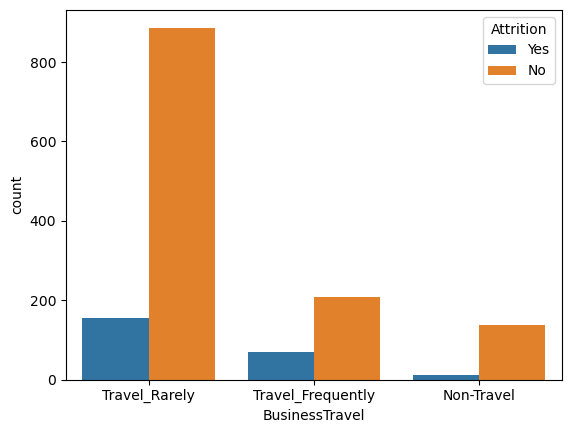

In [ ]:
sns.countplot(data = categorical_data, x = categorical_data['BusinessTravel'], hue = categorical_data['Attrition']);

## EducationField

## Gender

## JobRole

## MaritalStatus